# **뉴스 기사 요약하기**

---
### 📌 개요
> 1. 바이너리 파일을 문자열로 변경 - base64 <br>
> 2. 문자열에서 키워드 추출 - textwrap, re <br>
> 3. 단어 개수 구하기 - collections.Counter <br>
> 4. 문서 요약하기 - gensim <br>
> 5. 텍스트 파일 저장 - open, close <br>
> 6. 실습

# **1. 바이너리 파일을 문자열로 변경**

### **바이너리 파일 (Binary file)**
> - 바이너리 파일이란 ‘0’ 과 ‘1’ 을 이용한 **2진수 데이터** 만으로만으로 인코딩된 파일
> - 사람이 직접 읽을 수 없다
> - 데이터를 효율적으로 처리, 저장, 실행 등을 목적으로 만들어진 파일
> - 장점
>    - 데이터를 처리하고 전송하는데 일반적으로 비용이 적게 든다.
>    - 텍스트 파일에 비해서 데이터 처리 속도가 빠르다.
>    - 데이터 저장 공간도 적게 듦
> - 대표적인 확장자 : exe, dll, zip, rar, mp3, mpg, jpg, png 등

### **Base64 인코딩**
> - 다양한 통신채널 (HTML, 이메일 등) 을 통해 **바이너리 데이터**를 **안전하게 전송**할 수 있게 하는 방법
> - ASCII, Unicode 인코딩과 함께 실생활에서도 많이 사용되는 인코딩 방법
> - **ASCII (8bit) 인코딩은 프로토콜,시스템마다 다르게 해석되어 데이터가 왜곡될 여지가 있기 때문에 적합하지 않음**
> - XML이나 HTTP 프로토콜에서도 특수문자 파싱 문제를 해결할 수 있는 수단
> - 64 진법은 ASCII문자들을 모두 표현할 수 있는 가장 작은 진법

# **바이트 문자열 인코딩/디코딩**

 - 인코딩 로직 : `문자열 입력` -> `ASCII/Binary (8bit)로 변환`  -> `6bit 기준으로 cut` -> `base64로 변환`

In [1]:
import base64

In [2]:
string = 'We need Python !'

In [3]:
# base64는 바이너리(바이트)만 인코딩이 가능하므로 에러 발생
encoded = base64.b64encode(string)

TypeError: a bytes-like object is required, not 'str'

In [4]:
# ascii 인코딩
bstring = string.encode('ascii')
print(bstring)

b'We need Python !'


In [5]:
# base64 인코딩
encoded = base64.b64encode(bstring)
print(encoded)

b'V2UgbmVlZCBQeXRob24gIQ=='


In [6]:
# base64 디코딩
decoded = base64.decodebytes(encoded)
print(decoded)

b'We need Python !'


In [7]:
# ascii 디코딩
decoded_str = decoded.decode('ascii')
print(decoded_str)

We need Python !


# **이미지 인코딩/디코딩**

### **인코딩**

In [8]:
import base64

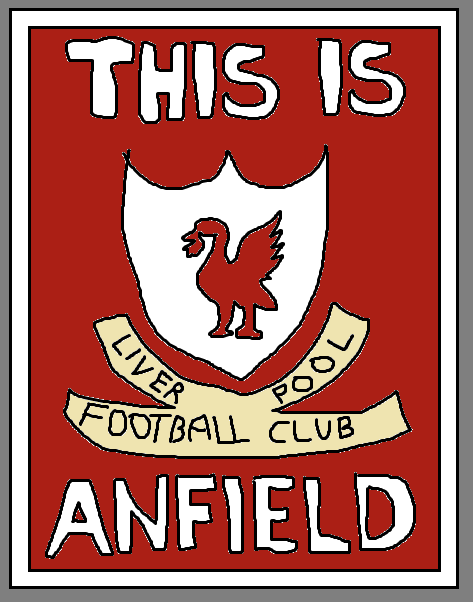

In [9]:
# 이미지 확인
# PIL이라는 이미지 확인 라이브러리가 없는 경우 pip install pillow로 설치
path = "./img/thisIsAnfield.png"
from PIL import Image
img = Image.open(path)
img

In [10]:
# 이미지를 바이너리 파일 형태로 읽기
# r = read, b = bytes
with open(path, 'rb') as img:
    image = img.read()

In [11]:
# 바이너리 파일 형태의 이미지 확인
image

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xd9\x00\x00\x02Z\x08\x06\x00\x00\x00c\x8b=\xe9\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc2\x00\x00\x0e\xc2\x01\x15(J\x80\x00\x00p\\IDATx^\xed\xbd\x0f\xac\x1e\xc7y\xee\xb7\xac\x95\\\x11\x96\x11\x11\xb1a\x12\t"\x11U.$\xe4"\x12q\x1d\x84B\x8c\x88\x8a\x1c\x9b\x84\x9d\x98\x84\xe2\x88\x8c\xe2\x8a\x8a{-\xca@\x8aC76\xc9\xb8\x8d\x8e\r\xe7JLn\xad\xe3\xdc\xb8\xa4\xdd\x14\xa2\xec\x06\xa4\x93\x08"Z\x1b\xa4\xdd\xab\x88),P\xb77\x01\x19W\x00U_\x15\x96\\\x07\xb2!\x15R\x90\x18R\x009,\x9f=\xf3\x9e\xf3\x9e9\xb3\x7ffwfwv\xe7\xf9\x01\x0b\xee\xf7\xf1\x9c\xef|\xbb;3\xcf\xbc\x7f\xe6\x9d\r\x0f<\xf0\xc0\xe5\x82\x10B\x08!\xc1\xf9/\xcc\xbf\x84\x10B\x08\t\x0cE\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89D\xabu\xb2\x9f\xfc\xe4\'\xcd\x19!\x84\x10\x92\x1fW\xb4\xd2\x9c\xf9AK\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89

In [12]:
# 바이트 정보 확인
# 0xff의 바이트 정보를 확인
# pip install bitstring
from bitstring import BitArray
input_str = '0xff'
c = BitArray(hex=input_str)
c.bin

'11111111'

In [13]:
# 이미지의 base64 인코딩(Ascii 인코딩이 따로 필요없음.. 왜?)
with open(path, 'rb') as img:
    data = img.read()
    encoded = base64.b64encode(data)
    print(encoded)

b'iVBORw0KGgoAAAANSUhEUgAAAdkAAAJaCAYAAABjiz3pAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsIAAA7CARUoSoAAAHBcSURBVHhe7b0PrB7Hee63rJVcEZYREbFhEgkiEVUuJOQiEnEdhEKMiIocm4SdmITiiIziiop7LcpAikM3Nsm4jY4N50pMbq3j3Lik3RSi7AakkwgiWhuk3auIKSxQtzcBGVcAVV8VllwHsiEVUpAYUgA5LJ89857znjmzf2Z3Znd25/kBC+738ZzvfLs7M8+8f+adDQ888MDlghBCCCHB+S/Mv4QQQggJDEWWEEIIiQRFlhBCCIkERZYQQgiJBEWWEEIIiQRFlhBCCIkERZYQQgiJRKt1sp/85CfNGSGEEJIfV7TSnPlBS5YQQgiJBEWWEEIIiYS3u/jyZVZhJIQQMn82bNhgzuguJoQQQpKDIksIIYREgiJLCCGERIIiSwghhESCIksIIYREgiJLCCGERIIiSwghhESCIksIIYREgiJLCCGERIIiSwghhESCIksIIYREgiJLCCGERIIiSwghhESCIksIIYREYvCt7vTWQYQQQkhM+mgWt7ojhBBCEoYiSwghhERiVHfxn1/3NnNGCCGEhOEDL7xkzuguJoQQQmYLRZYQQgiJBEWWEEIIiQRFlhBCCIkERZYQQgiJBEWWEEIIiQRFdiL84+IfFB/b8OYyNb3uwM88tefu4p1Pf9P8JiGEkLGgyCbINce/uE5Q77333uL55583P1ENfmZpaanYsmXLiug+sevO4q0n/sz8BCGEkKFgMYqEgLWKe91GTLuwefPm4tChQ8VPLv1b8w4heYEJ7P3339+5j11//fVlH3rrQ79n3iEpAgNDGLsYBUW2ghtOf7149NFHi9OnTwcVPXRSPKxrFj9evvYR1r179xaPPPJIcfXVV5t31oPvi8+7ePGieWc9+/fvL+65557i5f2/bt

In [14]:
# 인코딩된 이미지 파일로 저장
en_file = "img/encoded.png"

with open(en_file, 'wb') as file:
    file.write(encoded)

### **디코딩**

In [15]:
# base64 디코딩
decoded = base64.decodebytes(encoded)
print(decoded)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xd9\x00\x00\x02Z\x08\x06\x00\x00\x00c\x8b=\xe9\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc2\x00\x00\x0e\xc2\x01\x15(J\x80\x00\x00p\\IDATx^\xed\xbd\x0f\xac\x1e\xc7y\xee\xb7\xac\x95\\\x11\x96\x11\x11\xb1a\x12\t"\x11U.$\xe4"\x12q\x1d\x84B\x8c\x88\x8a\x1c\x9b\x84\x9d\x98\x84\xe2\x88\x8c\xe2\x8a\x8a{-\xca@\x8aC76\xc9\xb8\x8d\x8e\r\xe7JLn\xad\xe3\xdc\xb8\xa4\xdd\x14\xa2\xec\x06\xa4\x93\x08"Z\x1b\xa4\xdd\xab\x88),P\xb77\x01\x19W\x00U_\x15\x96\\\x07\xb2!\x15R\x90\x18R\x009,\x9f=\xf3\x9e\xf3\x9e9\xb3\x7ffwfwv\xe7\xf9\x01\x0b\xee\xf7\xf1\x9c\xef|\xbb;3\xcf\xbc\x7f\xe6\x9d\r\x0f<\xf0\xc0\xe5\x82\x10B\x08!\xc1\xf9/\xcc\xbf\x84\x10B\x08\t\x0cE\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89D\xabu\xb2\x9f\xfc\xe4\'\xcd\x19!\x84\x10\x92\x1fW\xb4\xd2\x9c\xf9AK\x96\x10B\x08\x89\x04E\x96\x10B\x08\x89

In [16]:
# 이미지 파일로 저장
de_file = "img/decoded.png"

with open(de_file, 'wb') as file:
    file.write(decoded)